## Importing Necessary Modules 

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## Extract keypoints using MP Holistics

In [2]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):

    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,100,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,250,120), thickness=1, circle_radius=1)
                             ) 

    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,20,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,40,120), thickness=2, circle_radius=2)
                             ) 

    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(120,20,80), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(120,40,250), thickness=2, circle_radius=2)
                             ) 
  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(250,120,70), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(250,70,230), thickness=2, circle_radius=2)
                             )

## Detecting Landmarks 

In [6]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret,frame = cap.read()
        
        image,results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image,results)
        
        
        cv2.imshow('check',image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
results

mediapipe.python.solution_base.SolutionOutputs

In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [10]:
frame

array([[[183, 147, 147],
        [189, 154, 154],
        [182, 147, 146],
        ...,
        [ 16,  15,  18],
        [ 17,  16,  20],
        [ 18,  17,  21]],

       [[183, 149, 150],
        [181, 147, 147],
        [184, 152, 150],
        ...,
        [ 16,  15,  18],
        [ 17,  16,  20],
        [ 18,  16,  21]],

       [[185, 155, 156],
        [169, 141, 141],
        [174, 148, 146],
        ...,
        [ 16,  15,  18],
        [ 16,  14,  19],
        [ 17,  15,  21]],

       ...,

       [[105, 111, 124],
        [ 86,  92, 105],
        [ 79,  84,  96],
        ...,
        [ 13,  13,  12],
        [ 13,  16,  14],
        [  8,  12,  10]],

       [[ 96, 102, 111],
        [ 89,  95, 104],
        [ 89,  94, 103],
        ...,
        [ 11,   9,   8],
        [  9,  10,   8],
        [  4,   6,   4]],

       [[ 97, 103, 109],
        [ 97, 103, 109],
        [ 89,  93, 101],
        ...,
        [ 17,  13,  12],
        [ 16,  16,  14],
        [ 11,  13,  10]]

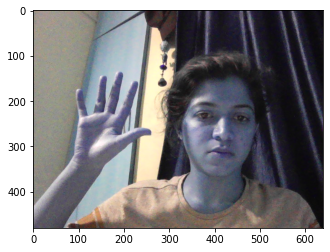

In [11]:
plt.imshow(frame)

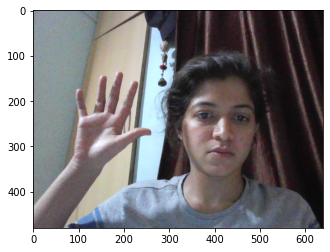

In [12]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [13]:
draw_styled_landmarks(frame,results)

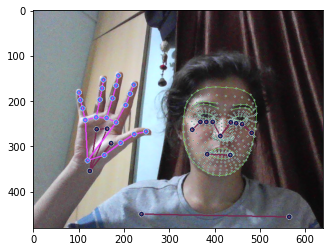

In [14]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [15]:
results.pose_landmarks

landmark {
  x: 0.6455156803131104
  y: 0.5773965120315552
  z: -0.8414663076400757
  visibility: 0.9999276399612427
}
landmark {
  x: 0.6815729141235352
  y: 0.5165870189666748
  z: -0.7694978713989258
  visibility: 0.9998771548271179
}
landmark {
  x: 0.7001484632492065
  y: 0.5190456509590149
  z: -0.7694898843765259
  visibility: 0.9997815489768982
}
landmark {
  x: 0.7206756472587585
  y: 0.523080587387085
  z: -0.7698549628257751
  visibility: 0.9998489618301392
}
landmark {
  x: 0.6197685599327087
  y: 0.5127694010734558
  z: -0.7584223747253418
  visibility: 0.9999151229858398
}
landmark {
  x: 0.597385823726654
  y: 0.5126003623008728
  z: -0.7574124932289124
  visibility: 0.9998833537101746
}
landmark {
  x: 0.5771855115890503
  y: 0.5141370892524719
  z: -0.7576221227645874
  visibility: 0.999944269657135
}
landmark {
  x: 0.7531880736351013
  y: 0.5633189082145691
  z: -0.33212170004844666
  visibility: 0.9997357726097107
}
landmark {
  x: 0.5497598052024841
  y: 0.54987341

## Extract Keypoint Values 

In [16]:
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])

In [17]:
test

array([4.30130661e-01, 3.55172014e+00, 8.78502578e-02, 7.39352836e-05])

In [18]:
results.pose_landmarks.landmark[-1]

x: 0.43013066053390503
y: 3.551720142364502
z: 0.08785025775432587
visibility: 7.393528358079493e-05

In [19]:
pose = []
for res in results.pose_landmarks.landmark:
    values = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(values)

In [20]:
pose

[array([ 0.64551568,  0.57739651, -0.84146631,  0.99992764]),
 array([ 0.68157291,  0.51658702, -0.76949787,  0.99987715]),
 array([ 0.70014846,  0.51904565, -0.76948988,  0.99978155]),
 array([ 0.72067565,  0.52308059, -0.76985496,  0.99984896]),
 array([ 0.61976856,  0.5127694 , -0.75842237,  0.99991512]),
 array([ 0.59738582,  0.51260036, -0.75741249,  0.99988335]),
 array([ 0.57718551,  0.51413709, -0.75762212,  0.99994427]),
 array([ 0.75318807,  0.56331891, -0.3321217 ,  0.99973577]),
 array([ 0.54975981,  0.54987341, -0.24991207,  0.99992865]),
 array([ 0.68112814,  0.66508746, -0.6856674 ,  0.99990278]),
 array([ 0.6014213 ,  0.66058123, -0.66483349,  0.99994022]),
 array([ 0.88354892,  0.94817245, -0.15801741,  0.99631464]),
 array([ 0.37458187,  0.93736458, -0.10359254,  0.99964231]),
 array([ 0.98705786,  1.44266498, -0.17222348,  0.15644702]),
 array([ 0.03423836,  1.12282097, -0.75883794,  0.99181747]),
 array([ 0.96938646,  1.82829773, -0.27772555,  0.06573708]),
 array([

In [21]:
len(results.pose_landmarks.landmark)

33

In [22]:
len(pose)

33

In [23]:
len(results.right_hand_landmarks.landmark)

21

In [24]:
len(results.face_landmarks.landmark)

468

In [25]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)

In [26]:
pose

array([ 6.45515680e-01,  5.77396512e-01, -8.41466308e-01,  9.99927640e-01,
        6.81572914e-01,  5.16587019e-01, -7.69497871e-01,  9.99877155e-01,
        7.00148463e-01,  5.19045651e-01, -7.69489884e-01,  9.99781549e-01,
        7.20675647e-01,  5.23080587e-01, -7.69854963e-01,  9.99848962e-01,
        6.19768560e-01,  5.12769401e-01, -7.58422375e-01,  9.99915123e-01,
        5.97385824e-01,  5.12600362e-01, -7.57412493e-01,  9.99883354e-01,
        5.77185512e-01,  5.14137089e-01, -7.57622123e-01,  9.99944270e-01,
        7.53188074e-01,  5.63318908e-01, -3.32121700e-01,  9.99735773e-01,
        5.49759805e-01,  5.49873412e-01, -2.49912068e-01,  9.99928653e-01,
        6.81128144e-01,  6.65087461e-01, -6.85667396e-01,  9.99902785e-01,
        6.01421297e-01,  6.60581231e-01, -6.64833486e-01,  9.99940217e-01,
        8.83548915e-01,  9.48172450e-01, -1.58017412e-01,  9.96314645e-01,
        3.74581873e-01,  9.37364578e-01, -1.03592537e-01,  9.99642313e-01,
        9.87057865e-01,  

In [27]:
face

array([ 0.65452719,  0.6381892 , -0.03580734, ...,  0.74209505,
        0.49086767,  0.02797568])

In [28]:
left_hand

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
right_hand

array([ 1.88671365e-01,  6.89635694e-01,  4.33026656e-07,  2.46822402e-01,
        6.65361583e-01, -2.34758295e-02,  3.01632613e-01,  6.09424472e-01,
       -3.19986157e-02,  3.49613488e-01,  5.69228232e-01, -3.94930020e-02,
        3.89546990e-01,  5.57285547e-01, -4.73023616e-02,  2.86808431e-01,
        5.15537262e-01, -1.77961700e-02,  3.19591403e-01,  4.36231554e-01,
       -3.24048512e-02,  3.35756838e-01,  3.84043455e-01, -4.47995141e-02,
        3.47785354e-01,  3.41841102e-01, -5.40387817e-02,  2.53543526e-01,
        4.94641751e-01, -1.87079720e-02,  2.74831831e-01,  4.04227078e-01,
       -3.03858388e-02,  2.86451995e-01,  3.46037120e-01, -4.28991430e-02,
        2.94554412e-01,  3.01194608e-01, -5.21414392e-02,  2.18512908e-01,
        4.92280841e-01, -2.26950366e-02,  2.30496749e-01,  4.12479043e-01,
       -3.51602286e-02,  2.37586200e-01,  3.59727114e-01, -4.79349494e-02,
        2.43640646e-01,  3.18839252e-01, -5.73675372e-02,  1.80481106e-01,
        5.05362093e-01, -

In [30]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    return np.concatenate([pose, face, left_hand, right_hand])

In [31]:
extract_keypoints(results)

array([ 0.64551568,  0.57739651, -0.84146631, ...,  0.15847281,
        0.37842023, -0.05361063])

In [32]:
extract_keypoints(results).shape

(1662,)

## Folder setup to collect keypoints for each frame

In [33]:
DATA_PATH = os.path.join('Feature_Extraction') 

actions = np.array(['hello', 'thanks', 'iloveyou','please','house'])

number_sequences = 50
sequence_length = 30

In [34]:
for action in actions: 
    for sequence in range(number_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## Feature Extraction 

In [35]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for action in actions:
        for sequence in range(number_sequences):
            for frame_num in range(sequence_length):

                
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                
                # Wait 
                if frame_num == 0: 
                    cv2.putText(image, 'START NEW ACTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
                    cv2.imshow('Action Detection', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
                    cv2.imshow('Action Detection', image)
                

                keypoints = extract_keypoints(results)
                keypoint_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(keypoint_path, keypoints)


                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [36]:
cap.release()
cv2.destroyAllWindows()

## Data Preprocessing 

In [37]:
classes = {label:num for num, label in enumerate(actions)}

In [38]:
classes

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'please': 3, 'house': 4}

In [39]:
sequences, labels = [], []
for action in actions:
    for sequence in range(number_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(classes[action])

In [40]:
np.array(sequences).shape

(250, 30, 1662)

In [41]:
np.array(labels).shape

(250,)

In [42]:
X = np.array(sequences)

In [43]:
from tensorflow.keras.utils import to_categorical
y= to_categorical(labels).astype(int)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [45]:
X_train.shape

(200, 30, 1662)

In [46]:
X_test.shape

(50, 30, 1662)

## LSTM Model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [52]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))

model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [53]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_5 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 596,741
Trainable params: 596,741
Non-tr

In [55]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 96ms/step - loss: 1.8205 - categorical_accuracy: 0.2000
Epoch 2/100
7/7 [==============================] - 1s 93ms/step - loss: 1.7451 - categorical_accuracy: 0.2100
Epoch 3/100
7/7 [==============================] - 1s 91ms/step - loss: 1.5346 - categorical_accuracy: 0.1800
Epoch 4/100
7/7 [==============================] - 1s 89ms/step - loss: 1.6388 - categorical_accuracy: 0.1800
Epoch 5/100
7/7 [==============================] - 1s 89ms/step - loss: 1.7176 - categorical_accuracy: 0.1600
Epoch 6/100
7/7 [==============================] - 1s 91ms/step - loss: 1.6019 - categorical_accuracy: 0.2300
Epoch 7/100
7/7 [==============================] - 1s 88ms/step - loss: 1.6075 - categorical_accuracy: 0.2150
Epoch 8/100
7/7 [==============================] - 1s 89ms/step - loss: 1.6003 - categorical_accuracy: 0.2200
Epoch 9/100
7/7 [==============================] - 1s 91ms/step - loss: 1.5990 - categorical_accuracy: 0.2150
Epoch 10/1

## Predictions

In [56]:
final_result = model.predict(X_test)

2/2 [==============================] - 0s 16ms/step


In [57]:
actions[np.argmax(final_result[0])]

'thanks'

In [58]:
actions[np.argmax(y_test[0])]

'thanks'

## Save our model

In [59]:
model.save('lstm_model.h5')

In [60]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 24ms/step


In [61]:
y_true = np.argmax(y_test, axis=1).tolist()
y_pred = np.argmax(y_pred, axis=1).tolist()

In [62]:
y_true

[1,
 1,
 4,
 0,
 3,
 2,
 1,
 1,
 0,
 4,
 0,
 3,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 3,
 2,
 0,
 4,
 4,
 0,
 0,
 2,
 0,
 1,
 3,
 2,
 4,
 4,
 3,
 1,
 0,
 1,
 0,
 0,
 3,
 1,
 2,
 4,
 4,
 2,
 3,
 0,
 4,
 2]

In [63]:
y_pred

[1,
 1,
 4,
 0,
 3,
 2,
 1,
 1,
 0,
 4,
 0,
 3,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 3,
 2,
 0,
 4,
 4,
 0,
 0,
 2,
 0,
 1,
 3,
 2,
 4,
 4,
 3,
 1,
 0,
 1,
 0,
 0,
 3,
 1,
 2,
 4,
 4,
 2,
 3,
 0,
 4,
 2]

## Performance Evaluation

In [64]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_true,y_pred)

array([[[37,  0],
        [ 0, 13]],

       [[39,  0],
        [ 0, 11]],

       [[40,  0],
        [ 0, 10]],

       [[43,  0],
        [ 0,  7]],

       [[41,  0],
        [ 0,  9]]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true,y_pred)

1.0

## Real Time Testing 

In [66]:
colors = [(255,0,0), (0,255,0), (0,0,255), (255,0,0), (0,255,0)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [70]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():


        ret, frame = cap.read()


        image, results = mediapipe_detection(frame, holistic)
        print(results)
        

        draw_styled_landmarks(image, results)
        

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            

            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]


            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        

        cv2.imshow('Action_Recognition', image)


        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [68]:
cap.release()
cv2.destroyAllWindows()